In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,  precision_score, recall_score, f1_score, classification_report, make_scorer
from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [ ]:
df = pd.read_csv('diabetes_data.csv')
df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


In [ ]:
df.shape

(70692, 18)

In [ ]:
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [ ]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [ ]:
df.corr()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
Age,1.000000,-0.002315,0.240338,0.101743,-0.038648,0.105424,0.221878,-0.100753,0.061096,-0.018893,-0.057705,0.155624,-0.101746,0.084852,0.195265,0.123879,0.338132,0.278738
Sex,-0.002315,1.000000,0.017324,-0.007991,0.000827,0.112125,0.098161,0.051753,-0.088723,-0.052604,0.014164,-0.014555,-0.089204,-0.045957,-0.082248,0.003822,0.040819,0.044413
HighChol,0.240338,0.017324,1.000000,0.085981,0.131309,0.093398,0.181187,-0.090453,-0.047384,-0.042836,-0.025443,0.237778,0.083881,0.142610,0.162043,0.099786,0.316515,0.289213
CholCheck,0.101743,-0.007991,0.085981,1.000000,0.045648,-0.004331,0.043497,-0.008249,0.017384,0.000349,-0.027146,0.059213,-0.010660,0.034540,0.044430,0.022529,0.103283,0.115382
BMI,-0.038648,0.000827,0.131309,0.045648,1.000000,0.011551,0.060355,-0.170936,-0.084505,-0.056528,-0.058232,0.267888,0.104682,0.161862,0.246094,0.022931,0.241019,0.293373
Smoker,0.105424,0.112125,0.093398,-0.004331,0.011551,1.000000,0.124418,-0.079823,-0.074811,-0.029926,0.077835,0.152416,0.091257,0.120698,0.119789,0.064658,0.087438,0.085999
HeartDiseaseorAttack,0.221878,0.098161,0.181187,0.043497,0.060355,0.124418,1.000000,-0.098223,-0.019436,-0.036315,-0.037130,0.275868,0.075057,0.198416,0.232611,0.223394,0.210750,0.211523
PhysActivity,-0.100753,0.051753,-0.090453,-0.008249,-0.170936,-0.079823,-0.098223,1.000000,0.133813,0.149322,0.019111,-0.273548,-0.130090,-0.234500,-0.276868,-0.079985,-0.136102,-0.158666
Fruits,0.061096,-0.088723,-0.047384,0.017384,-0.084505,-0.074811,-0.019436,0.133813,1.000000,0.238605,-0.033246,-0.098687,-0.062102,-0.048572,-0.050784,-0.008996,-0.040852,-0.054077
Veggies,-0.018893,-0.052604,-0.042836,0.000349,-0.056528,-0.029926,-0.036315,0.149322,0.238605,1.000000,0.022090,-0.115795,-0.052359,-0.066896,-0.084072,-0.047601,-0.066624,-0.079293


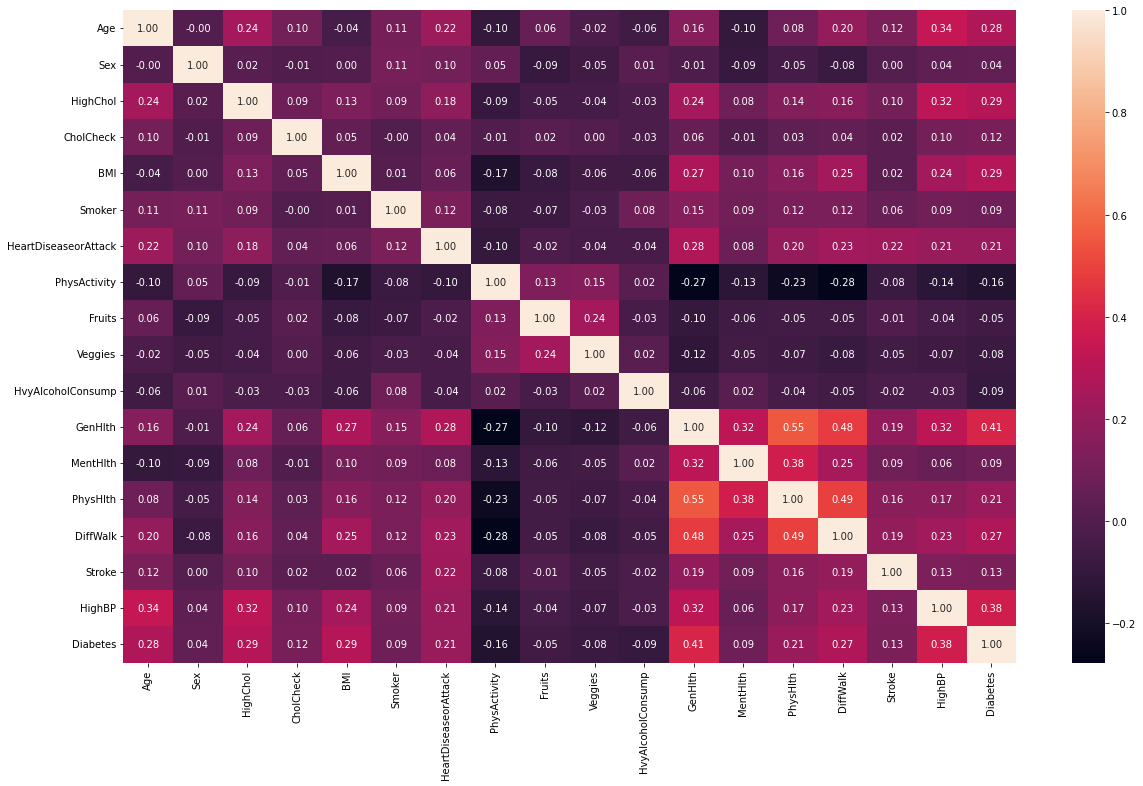

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', ax=ax)
plt.show()

In [ ]:
df['Diabetes'].value_counts()

0.0    35346
1.0    35346
Name: Diabetes, dtype: int64

In [ ]:
X = df.drop('Diabetes', axis = 1)
y = df['Diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
modelo_logistica = LogisticRegression(max_iter=300)
modelo_logistica.fit(X_train, y_train)
y_pred = modelo_logistica.predict(X_test)

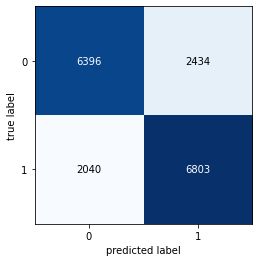

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      8837
         1.0       0.74      0.77      0.75      8836

    accuracy                           0.75     17673
   macro avg       0.75      0.75      0.75     17673
weighted avg       0.75      0.75      0.75     17673



--------


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
from sklearn.datasets import load_breast_cancer

# Load dataset
df = pd.read_csv('diabetes_data.csv')

# Split data into features and target
X = df.drop('Diabetes', axis = 1)
y = df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42, stratify = y)

# Create a dictionary of hyperparameters to tune
logreg_params = {"penalty" : ["l1", "l2"],
                  "solver" : ["lbfgs", "liblinear"],
                  "max_iter" : range(300, 1000, 100)}

# Create a logistic regression estimator
logreg = LogisticRegression()

# Use GridSearchCV to tune hyperparameters for each estimator
logreg_grid = GridSearchCV(estimator=logreg, param_grid=logreg_params, scoring='recall', cv=5)

# Fit each estimator to the data
logreg_grid.fit(X_train, y_train)

# Print the best hyperparameters for each estimator
print("Logistic Regression best hyperparameters: ", logreg_grid.best_params_)

# Use cross-validation to evaluate each estimator with the recall metric
logreg_recall = cross_val_score(logreg_grid.best_estimator_, X, y, cv=5, scoring='recall')

# Print the mean recall score for each estimator
print("Logistic Regression mean recall score: ", logreg_recall.mean())


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver l

Logistic Regression best hyperparameters:  {'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression mean recall score:  0.766989070954061


In [ ]:
df_logreg_grid = pd.DataFrame(logreg_grid.cv_results_)
df_logreg_grid.sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
21,1.497967,0.194736,0.014183,0.001358,800,l1,liblinear,"{'max_iter': 800, 'penalty': 'l1', 'solver': '...",0.774802,0.779894,0.761977,0.760656,0.764806,0.768427,0.007580,1
9,1.527808,0.204278,0.016483,0.005651,500,l1,liblinear,"{'max_iter': 500, 'penalty': 'l1', 'solver': '...",0.774613,0.779706,0.762354,0.760656,0.764806,0.768427,0.007428,1
13,1.483712,0.191249,0.014026,0.001004,600,l1,liblinear,"{'max_iter': 600, 'penalty': 'l1', 'solver': '...",0.774613,0.780083,0.761977,0.760468,0.764240,0.768276,0.007701,3
17,1.481330,0.196695,0.019323,0.004751,700,l1,liblinear,"{'max_iter': 700, 'penalty': 'l1', 'solver': '...",0.774613,0.780083,0.761977,0.760468,0.764240,0.768276,0.007701,3
2,1.915690,0.718694,0.016208,0.002442,300,l2,lbfgs,"{'max_iter': 300, 'penalty': 'l2', 'solver': '...",0.774991,0.779706,0.761977,0.760279,0.764429,0.768276,0.007670,5
6,1.737451,0.509977,0.016802,0.006109,400,l2,lbfgs,"{'max_iter': 400, 'penalty': 'l2', 'solver': '...",0.774991,0.779706,0.761977,0.760279,0.764429,0.768276,0.007670,5
22,1.372102,0.079602,0.013743,0.000453,800,l2,lbfgs,"{'max_iter': 800, 'penalty': 'l2', 'solver': '...",0.774991,0.779706,0.761977,0.760279,0.764429,0.768276,0.007670,5
10,1.392665,0.075037,0.014336,0.000953,500,l2,lbfgs,"{'max_iter': 500, 'penalty': 'l2', 'solver': '...",0.774991,0.779706,0.761977,0.760279,0.764429,0.768276,0.007670,5
18,1.652228,0.560303,0.013716,0.000430,700,l2,lbfgs,"{'max_iter': 700, 'penalty': 'l2', 'solver': '...",0.774991,0.779706,0.761977,0.760279,0.764429,0.768276,0.007670,5
26,1.675381,0.592828,0.017285,0.002566,900,l2,lbfgs,"{'max_iter': 900, 'penalty': 'l2', 'solver': '...",0.774991,0.779706,0.761977,0.760279,0.764429,0.768276,0.007670,5


In [ ]:
knn_params = {"weights" : ["distance", "uniform"],
              "metric" : ["manhattan", "euclidean", "minkowski"],
              "n_neighbors" : range(3, 20)}

# Create a KNN estimator
knn = KNeighborsClassifier()

# Use GridSearchCV to tune hyperparameters for each estimator
knn_grid = GridSearchCV(estimator=knn, param_grid=knn_params, scoring='recall', cv=5)

# Fit each estimator to the data
knn_grid.fit(X_train, y_train)

# Print the best hyperparameters for each estimator
print("KNN best hyperparameters: ", knn_grid.best_params_)

# Use cross-validation to evaluate each estimator with the recall metric
knn_recall = cross_val_score(knn_grid.best_estimator_, X, y, cv=5, scoring='recall')

# Print the mean recall score for each estimator
print("KNN mean recall score: ", knn_recall.mean())

KNN best hyperparameters:  {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
KNN mean recall score:  0.6190516354951785


melhores parâmetros KNN:

KNN best hyperparameters:  {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}

KNN mean recall score:  0.6190516354951785